# <center> 👉 class_09_2 » _Image Pyramids - Gaussian & Laplacian Pyramids_ </center>    
    
* Normally, we used to work with an image of constant size.   
* But on some occasions, we need to work with (the same) images in different resolution.   
* For example, while searching for something in an image, like face,   
* we are not sure at what size the object will be present in said image.   
* In that case, we will need to create a set of the same image with different resolutions and search for object in all of them.   
* These set of images with different resolutions are called Image Pyramids   
- (because when they are kept in a stack with the highest resolution image at the bottom and the lowest resolution image at top, it looks like a pyramid).


## ▶ Image Pyramids

Image Pyramids are one of the most beautiful concept of image processing.  
Normally, we work with images with default resolution but many times we need to change the resolution (lower it) or resize the original image in that case image pyramids comes handy.  

* The pyrUp() function increases the size to double of its original size and   
* pyrDown() function decreases the size to half.   

<img src='./images/practice_img/Pyramids.png' align='left' width=300 height=300> <img src='./images/practice_img/pyramid2.webp' width=200 height=200> 

If we keep the original image as a base image and go on applying pyrDown function on it and keep the images in a vertical stack, it will look like a pyramid.   
The same is true for upscaling the original image by pyrUp function.
Once we scale down and if we rescale it to the original size, we lose some information and the resolution of the new image is much lower than the original one.  


There are two kinds of Image Pyramids.  
1. Gaussian Pyramids   
2. Laplacian Pyramids

* Higher level (Low resolution) in a Gaussian Pyramid is formed by removing consecutive rows and columns in Lower level (higher resolution) image.   
* Then each pixel in higher level is formed by the contribution from 5 pixels in underlying level with gaussian weights.   
* By doing so, a M×N image becomes M/2×N/2 image. So area reduces to one-fourth of original area.   
* It is called an **Octave**.   
* The same pattern continues as we go upper in pyramid (ie, resolution decreases).   
* Similarly while expanding, area becomes 4 times in each level.   

We can find Gaussian pyramids using cv.pyrDown() and cv.pyrUp() functions.

Sometimes to detect an object (like face or car or anything thing of that sort) in an image,   
we need to resize or sub-sample the image and run the further analysis.   
In such cases, we maintain a collection of same image with different resolutions.   
We call this collection as **Image Pyramid**.   
- The reason behind calling it as a pyramid is when we arrange the images in decreasing order of their resolution, we obtain a shape like pyramid with square base.   

Below is an example of Image Pyramiding  

        이미지 피라미드(image pyramid)란 이미지의 크기를 피라미드처럼 단계적으로 확대하거나 축소하는 작업을 말합니다.   
        이미지 피라미드의 의미는 이미지의 크기를 확대하거나 축소했을 때 이미지들의 형태가 피라미드와 같이 표현됩니다.  
        - 원본 이미지에서 크기를 확대하는 것을 업 샘플링이라 하며 하위 단계의 이미지를 생성하게 됩니다.  
        - 반대로 원본 이미지에서 크기를 축소하는 것을 다운 샘플링이라 하며, 상위 단계의 이미지를 생성하게 됩니다.  
        - 이미지 피라미드로는 가우시안 피라미드(Gaussian Pyramid)와 라플라시안 피라미드(Laplacian pyramid)를 활용합니다.  
        - 이미지를 확대하는 경우에는 픽셀에 대한 보간법, 이미지를 축소하는 경우에는 픽셀에 대한 병합법이 수행됩니다.

        👉이미지 피라미드는 2배로 확대하거나 축소하는 경우만 가능하므로,   
           원하는 크기로 변환하기 위해서 이미지 크기 조절 함수 cv2.resize 를 사용합니다.

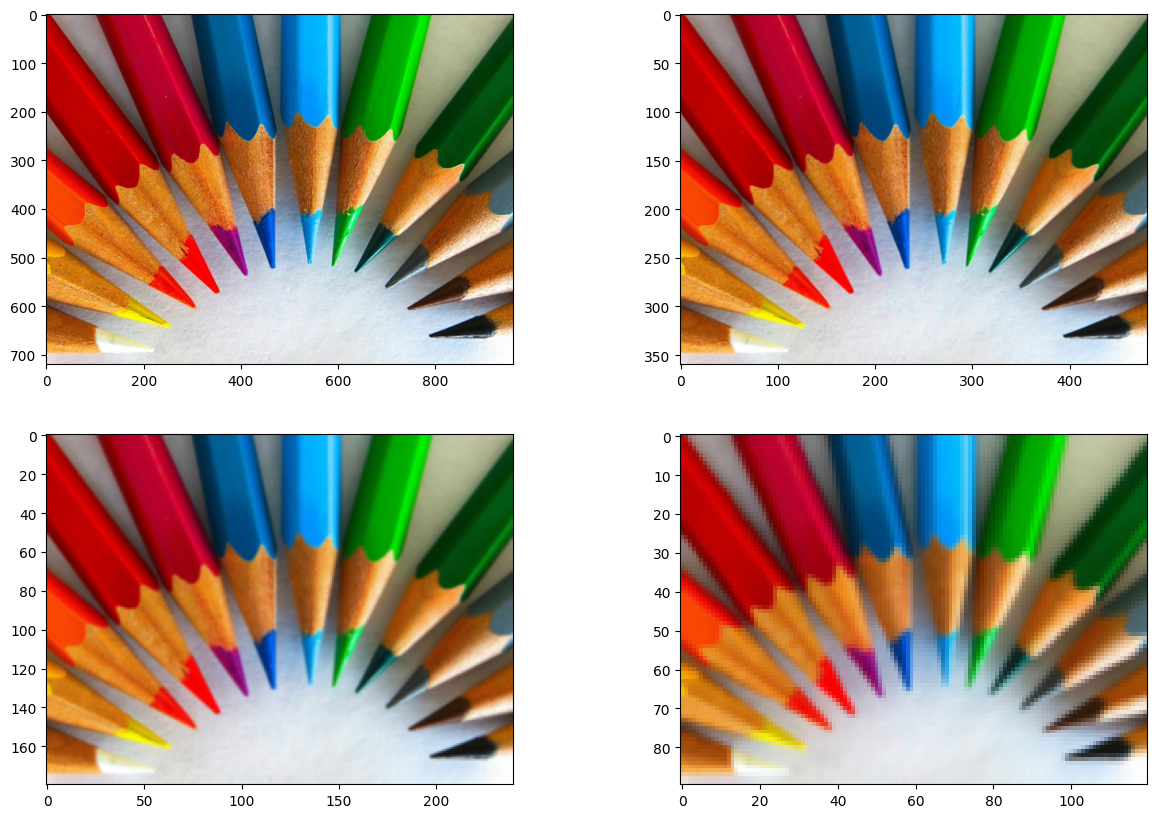

In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=100) 

img = cv2.imread("./images/practice_img/pencil.webp")
  
layer = img.copy()
img_stack=[]
for i in range(4):
    plt.subplot(2, 2, i + 1)
  
    # using pyrDown() function
    layer = cv2.pyrDown(layer)
    img_stack.append(layer)
    plt.imshow(cv2.cvtColor(layer, cv2.COLOR_BGR2RGB))
    cv2.imshow("str(i)", layer)
    cv2.waitKey(0)

cv2.destroyAllWindows()

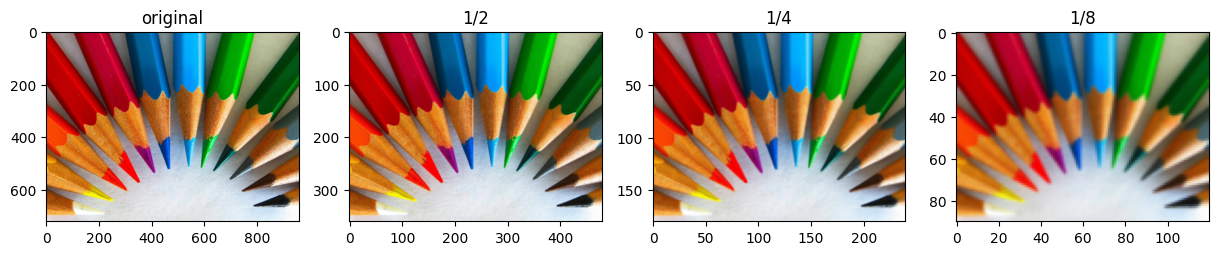

In [2]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

plt.subplot(141),plt.imshow(cv2.cvtColor(img_stack[0], cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('on')
plt.subplot(142),plt.imshow(cv2.cvtColor(img_stack[1], cv2.COLOR_BGR2RGB)),plt.title('1/2'),plt.axis('on')
plt.subplot(143),plt.imshow(cv2.cvtColor(img_stack[2], cv2.COLOR_BGR2RGB)),plt.title('1/4'),plt.axis('on')
plt.subplot(144),plt.imshow(cv2.cvtColor(img_stack[3], cv2.COLOR_BGR2RGB)),plt.title('1/8'),plt.axis('on')
plt.show()

👉 Advantages of Image pyramids:

- Lowering of resolution
- Getting various sizes of image
- Image Blending
- Edge detection

### ■ Gaussian Pyramids  

- **dst = cv2.pyrDown(src, dst, dstsize, borderType)**  
- **dst = cv2.pyrUp(src, dst, dstsize, borderType)**  

In [4]:
# Gaussian Pyramid (pyramid_gaussian.py)

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/messi2.jpeg')

smaller = cv2.pyrDown(img) # img x 1/4  
bigger = cv2.pyrUp(img) # img x 4 

cv2.imshow('org', img)
cv2.imshow('pyrDown', smaller)
cv2.imshow('pyrUp', bigger)
cv2.waitKey(0)
cv2.destroyAllWindows()

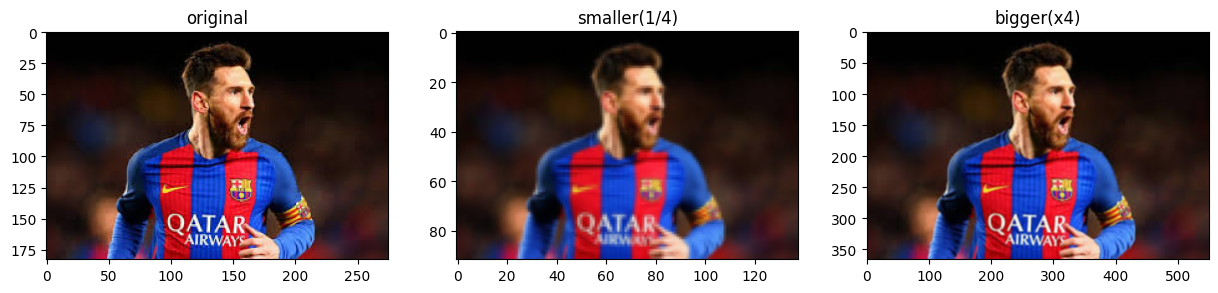

In [5]:
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

plt.subplot(131),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('on')
plt.subplot(132),plt.imshow(cv2.cvtColor(smaller, cv2.COLOR_BGR2RGB)),plt.title('smaller(1/4)'),plt.axis('on')
plt.subplot(133),plt.imshow(cv2.cvtColor(bigger, cv2.COLOR_BGR2RGB)),plt.title('bigger(x4)'),plt.axis('on')
plt.show()

## 2. 2. Laplacian Pyramids  

When you enlarge an image with the cv2.pyUp() function, new rows and columns filled with zeros are inserted, so the __image quality is lower than the original image.__  

Therefore, if you apply the cv2.pyDown() function and then do cv2.pyUp() again, the image quality will be significantly lower than the original image.
A method to __improve this problem is the Laplacian pyramid.__  

cv2.pyUp() 함수로 이미지를 확대하면 0으로 채워진 행과 열이 새롭게 삽입되므로 원본 이미지보다 화질이 떨어집니다.   
따라서 cv2.pyDown() 함수를 적용한 뒤 다시 cv2.pyUp()을 하면 원본 이미지보다 화질이 많이 떨어집니다.   
이런 문제점을 개선한 방식이 라플라시안 피라미드(laplacian pyramid)입니다.  

In [7]:
# Image restoration using Laplacian pyramid (pyramid_laplacian.py)

import cv2
import numpy as np

img = cv2.imread('./images/messi2.jpeg')
h, w = img.shape[:2]
print(h,w, img.shape)

183 275 (183, 275, 3)


In [8]:
img.shape[:2]
np.moveaxis(img, 0, 1).shape[:2]

(275, 183)

In [9]:
smaller = cv2.pyrDown(img) 
bigger = cv2.pyrUp(smaller) 
bigger = cv2.resize(bigger, np.moveaxis(img, 0, 1).shape[:2])

print(bigger.shape)

(183, 275, 3)


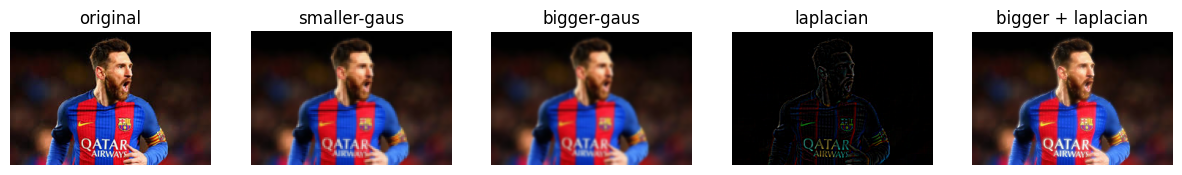

In [10]:
laplacian = cv2.subtract(img, bigger) #  make same size

restored = bigger + laplacian 

merged = np.hstack((img, laplacian, bigger, restored))
cv2.imshow('Laplacian Pyramid', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 15), dpi=100)

plt.subplot(151),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(152),plt.imshow(cv2.cvtColor(smaller, cv2.COLOR_BGR2RGB)),plt.title('smaller-gaus'),plt.axis('off')
plt.subplot(153),plt.imshow(cv2.cvtColor(bigger, cv2.COLOR_BGR2RGB)),plt.title('bigger-gaus'),plt.axis('off')
plt.subplot(154),plt.imshow(cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB)),plt.title('laplacian'),plt.axis('off')
plt.subplot(155),plt.imshow(cv2.cvtColor(restored, cv2.COLOR_BGR2RGB)),plt.title('bigger + laplacian'),plt.axis('off')

plt.show()

The Laplacian pyramid is implemented by adding the difference between the image to which the cv2.pyrUp() function is applied and the original image to the image to which the cv2.pyrUp() function is applied.
The image to which cv2.pyrUp() has been applied is the 3rd image, but you can see that the image quality has deteriorated significantly.
However, the 5th image using the Laplacian pyramid was restored as clearly as the original.

라플라시안 피라미드는 cv2.pyrUp() 함수를 적용한 이미지와 원본 이미지의 차를 cv2.pyrUp() 함수를 적용한 이미지에 더해주는 방식으로 구현됩니다.  
그냥 cv2.pyrUp()을 적용한 이미지가 3rd 이미지인데 화질이 많이 떨어지는 것을 볼 수 있습니다.   
하지만 라플라시안 피라미드를 적용한 5th 이미지는 원본과 같이 또렷히 복구가 되었습니다.

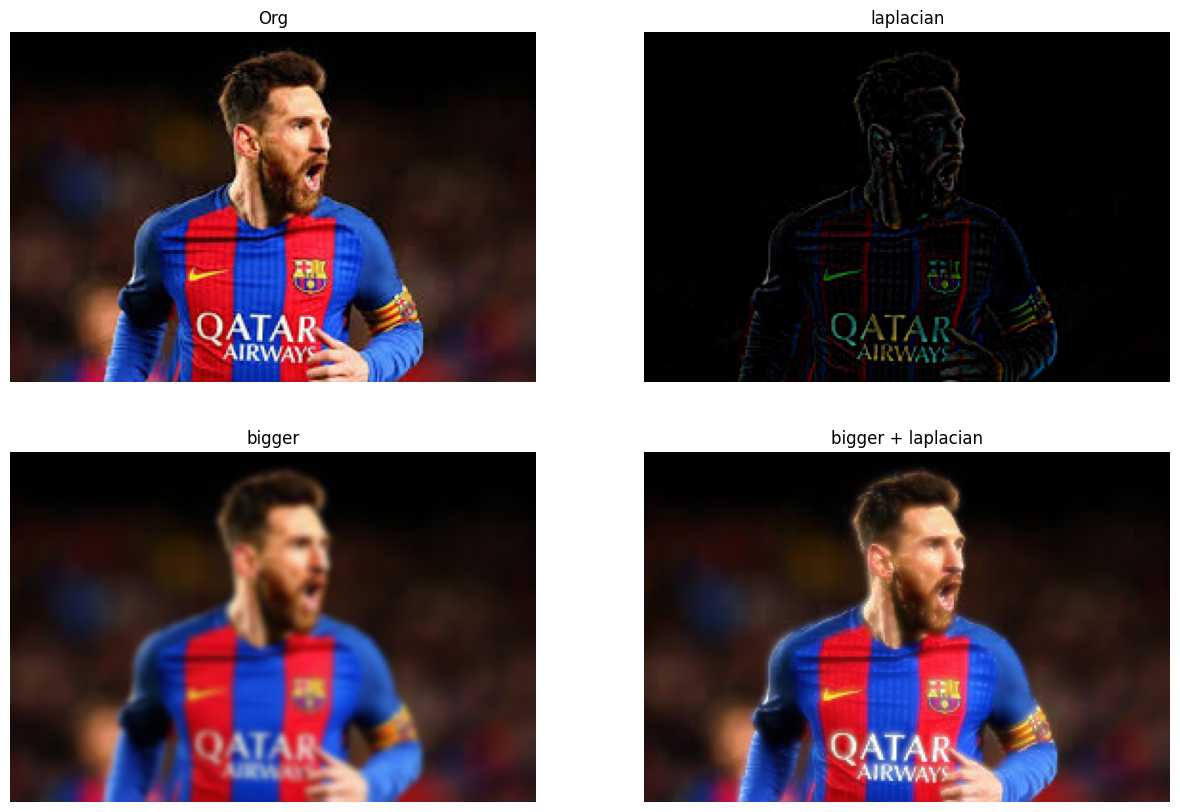

In [11]:
from matplotlib.pyplot import figure
win_names = {'Org' : img, 'laplacian':laplacian, 'bigger':bigger, 'bigger + laplacian':restored}
figure(figsize=(15, 10), dpi=100)
for i, (k, v) in enumerate(win_names.items()):
    plt.subplot(2,2,i+1)
    plt.title(k),plt.axis('off')
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
plt.show()

## ▶ Image Blending using Pyramids  

One application of Pyramids is Image Blending.   
For example, in image stitching, you will need to stack two images together, but it may not look good due to discontinuities between images.   
In that case, __image blending with Pyramids gives you seamless blending without leaving much data in the images.__   

One classical example of this is the blending of two fruits, Orange and Apple.   
See the result now itself to understand what it gives:

Simply it is done as follows:

1. Load the two images of apple and orange
2. Find the __Gaussian Pyramids__ for apple and orange (in this particular example, number of levels is 6)
3. From Gaussian Pyramids, find their __Laplacian Pyramids__
4. Now __join the left half of apple and right half of orange__ in each levels of Laplacian Pyramids
5. Finally from this joint image pyramids, reconstruct the original image.

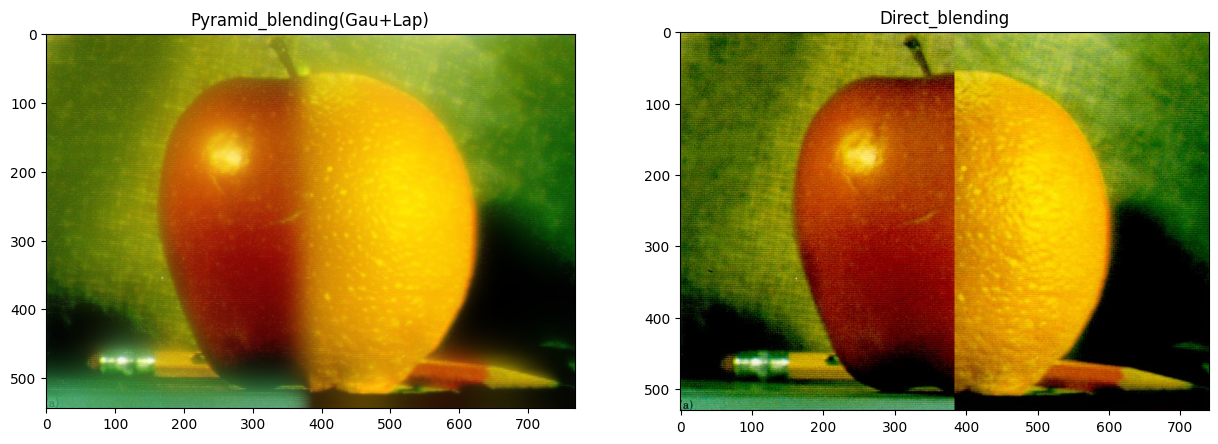

In [14]:
import cv2 as cv
import numpy as np,sys
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15, 15), dpi=100)

A = cv.imread('./images/practice_img/apple.png')
B = cv.imread('./images/practice_img/orange.png')


G = A.copy()     # generate Gaussian pyramid for A
gpA = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpA.append(G)
# print(type(gpA))

# cv2.imshow('Laplacian Pyramid', gpA)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
    

G = B.copy()     # generate Gaussian pyramid for B
gpB = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpB.append(G)


lpA = [gpA[5]]    # generate Laplacian Pyramid for A
for i in range(5,0,-1):
    GE = cv.pyrUp(gpA[i])
    gpA[i-1]=cv2.resize(gpA[i-1], np.moveaxis(GE, 0, 1).shape[:2]) # make same size with transpose
#     print(GE.shape, gpA[i-1].shape)
    L = cv.subtract(gpA[i-1],GE)
    lpA.append(L)


lpB = [gpB[5]]     # generate Laplacian Pyramid for B
for i in range(5,0,-1):
    GE = cv.pyrUp(gpB[i])
    gpB[i-1]=cv2.resize(gpB[i-1], np.moveaxis(GE, 0, 1).shape[:2]) # make same size with transpose
    L = cv.subtract(gpB[i-1],GE)
    lpB.append(L)

LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))  # Now add left and right halves of images in each level
    LS.append(ls)

ls_ = LS[0]
for i in range(1,6):     # now reconstruct
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.add(ls_, LS[i])    
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))   # image with direct connecting each half

# cv.imwrite('./results/Pyramid_blending2.jpg',ls_)
# cv.imwrite('./results/Direct_blending.jpg',real)  

plt.subplot(121),plt.imshow(cv2.cvtColor(ls_, cv2.COLOR_BGR2RGB)),plt.title('Pyramid_blending(Gau+Lap)')
plt.subplot(122),plt.imshow(cv2.cvtColor(real, cv2.COLOR_BGR2RGB)),plt.title('Direct_blending')
plt.show()